# Density Function Analysis

The intent is to describe the "attacker" in terms of how long it takes it to sink a number of ships. This is described in terms of a cumulative density function, which can also be transformed into a probability density function. Since there are a finite number of squares in the battleship grid (typically 100), it is reasonable to say that once all shots have been fired, all ships have been sunk with probability 1.

### The scenarios

A game of battleship is simulated with 1,2, and 3 ships, each one of size 1 (one grid/cell). The attacker takes random shots at the 100-square board. If it is a HIT, the ship sinks. The game is won when the attacker sinks all the ships. 

The number of shots it took to win is then stored. The game is played 10,000 times. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Utility functions
def getUnusedCoordinate(usedCoordinates=[]):
    while True:
        coordinate = random.randint(1,MAX_NUM)
        if coordinate not in usedCoordinates:
            return coordinate
        
        
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

### One-ship scenario

The mean is: 50.5786
The mean is: 50.5786


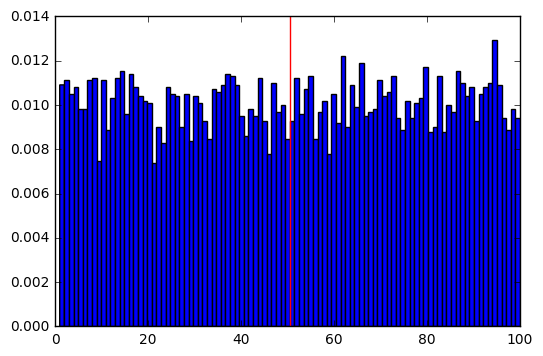

In [3]:
NUM_EXPERIMENTS = 10000
experimentResult = np.empty(NUM_EXPERIMENTS)

MAX_NUM = 100
#Pick a random place to place the ship 
ship1Coordinate = getUnusedCoordinate()
#print ship1Coordinate

for i in range(NUM_EXPERIMENTS):

    ship1Sunk = False
    keepShooting = True
    numShotsTaken = 0
    shotsTaken = list()

    #Fire randomly until ship is sunken. 
    while keepShooting:
        randomShotCoordinate = random.randint(1,MAX_NUM)

        #if we have shot this before, try again. 
        if randomShotCoordinate in shotsTaken:
            continue
        else:
            shotsTaken.append(randomShotCoordinate)
            numShotsTaken += 1

            if ship1Coordinate == randomShotCoordinate:
                ship1Sunk = True
                #print("Shot " + str(randomShotCoordinate) + ", took this many shots " + str(numShotsTaken))
                keepShooting = False

    experimentResult[i]=numShotsTaken

plt.hist(experimentResult,bins=MAX_NUM,normed=True,range=(1,MAX_NUM));

print("The mean is: " + str(experimentResult.mean()))

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

It can be seen that the random-attacker takes on average 50 shots to sink one ship. 

### Two-ship scenario

The mean is: 67.8364


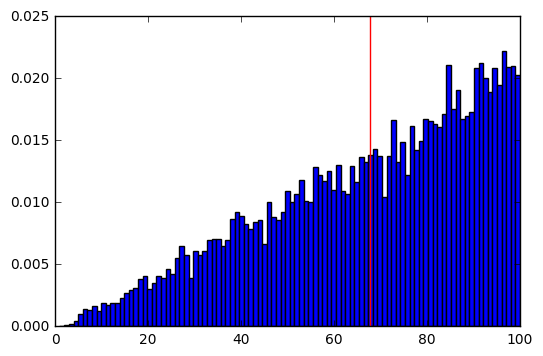

In [4]:
experimentResult = np.empty(NUM_EXPERIMENTS)

MAX_NUM = 100
#Pick a random place to place the ship 
ship1Coordinate = random.randint(1,MAX_NUM)
        
ship1Coordinate = getUnusedCoordinate([])
ship2Coordinate = getUnusedCoordinate([ship1Coordinate])

#print ship1Coordinate
#print ship2Coordinate
for i in range(NUM_EXPERIMENTS):

    ship1Sunk = False
    ship2Sunk = False
    keepShooting = True
    numShotsTaken = 0
    shotsTaken = list()

    #Fire randomly until ship is sunken. 
    while keepShooting:
        randomShotCoordinate = random.randint(1,MAX_NUM)

        #if we have shot this before, try again. 
        if randomShotCoordinate in shotsTaken:
            continue
        else:
            shotsTaken.append(randomShotCoordinate)
            numShotsTaken += 1

            if ship1Coordinate == randomShotCoordinate:
                ship1Sunk = True
                #print("Shot " + str(randomShotCoordinate) + ", took this many shots " + str(numShotsTaken))
            elif ship2Coordinate == randomShotCoordinate:
                ship2Sunk = True
                #print("Shot " + str(randomShotCoordinate) + ", took this many shots " + str(numShotsTaken))
                
            if ship1Sunk and ship2Sunk:
                keepShooting = False

    experimentResult[i]=numShotsTaken

plt.hist(experimentResult,bins=MAX_NUM,normed=True,range=(1,MAX_NUM));

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

The mean number of shots has gone up ~18%, from 50% to 68%, after adding another single-square ship. 

### Three-ship scenario

The mean is: 75.7435


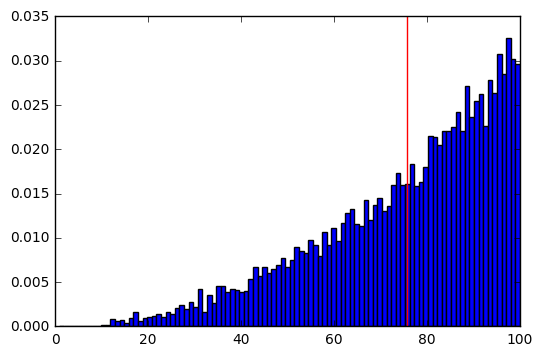

In [5]:
experimentResult = np.empty(NUM_EXPERIMENTS)

MAX_NUM = 100
#Pick a random place to place the ship 
ship1Coordinate = getUnusedCoordinate()
ship2Coordinate = getUnusedCoordinate([ship1Coordinate])
ship3Coordinate = getUnusedCoordinate([ship1Coordinate,ship2Coordinate])

#print ship1Coordinate
#print ship2Coordinate
#print ship3Coordinate

for i in range(NUM_EXPERIMENTS):

    ship1Sunk = False
    ship2Sunk = False
    ship3Sunk = False

    keepShooting = True
    numShotsTaken = 0
    shotsTaken = list()

    #Fire randomly until ship is sunken. 
    while keepShooting:
        randomShotCoordinate = random.randint(1,MAX_NUM)

        #if we have shot this before, try again. 
        if randomShotCoordinate in shotsTaken:
            continue
        else:
            shotsTaken.append(randomShotCoordinate)
            numShotsTaken += 1

            if ship1Coordinate == randomShotCoordinate:
                ship1Sunk = True
                #print("Shot " + str(randomShotCoordinate) + ", took this many shots " + str(numShotsTaken))
            elif ship2Coordinate == randomShotCoordinate:
                ship2Sunk = True
                #print("Shot " + str(randomShotCoordinate) + ", took this many shots " + str(numShotsTaken))
            elif ship3Coordinate == randomShotCoordinate:
                ship3Sunk = True
                #print("Shot " + str(randomShotCoordinate) + ", took this many shots " + str(numShotsTaken))
                
            if ship1Sunk and ship2Sunk and ship3Sunk:
                keepShooting = False

    experimentResult[i]=numShotsTaken

plt.hist(experimentResult,bins=MAX_NUM,normed=True,range=(1,MAX_NUM));

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

Again, the mean number of shots has gone up from 68% to 75% when playing against 3 ships.

Our goal is to lower the mean number of shots required to sink all the ships by training the artificially intelligent battleship player with reinforcement learning. 